In [40]:
import numpy as np
import twitter
import matplotlib.pyplot as plt
import json

CONSUMER_KEY = 'fjRSNYpRexhGGEBRZ6wDtR46W' #API key
CONSUMER_SECRET = 'TsN5f7qN6SHUFliBptqqu4FFh3YLx6tisldkvFx5C065HiwaoE'#secret api key
OAUTH_TOKEN = '804135069988306947-WoNcUYrqIJsfcdKegraukBv3oF4hsKA' #OAUTH1 token
OAUTH_TOKEN_SECRET = 'x3O77abe4vDaQ40ad8h5SforRGoLY7G9kBjOiRuTBrnEj' #OAUTH1 secret token

username = "edmundyu1001"

### BEARER_TOKEN: AAAAAAAAAAAAAAAAAAAAAMp2ZwEAAAAAx1FMkvOgtdik4B0KKqoD3enIKZk%3DjLbLeDoYvSJTFcNzyzpKHsMytYx8htHWn14w6zy5XPDC32lxLR

"""
Connection to twitter API, used in cell 1 of the twitter cookbook, added my credentials and username here
"""
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)



In [ ]:
import cookbook as cb
import networkx as nx 
# cb.crawl_followers(twitter_api, username, limit=10, depth=2)

depth = 2
limit =4


seed_id = str(twitter_api.users.show(screen_name=username)['id'])
print("seed id: ", seed_id)

#get the first users friends and followers
friend_queue, follower_queue = cb.get_friends_followers_ids(twitter_api, user_id=seed_id, 
                                          friends_limit=limit, followers_limit=limit)

print("follower queue of YU: ", follower_queue)
"""
TODO: find the reciprocal friends, as done in a2 file cell 2 -------------------------------------------- DONE
TODO: find the 5 most popular reciprocal friends, as done in a2 file ------------------------------------ DONE
TODO: create networkx graph, and make the connections between reciprocal friends, and the user
TODO: calculate diameter of networkx graph
TODO: calculate average distance of networkx graph
"""
print("five most popular........")
five_most_popular = find_five_pop_reciprocals(friend_queue, follower_queue)
for x in five_most_popular:
    print(x)

fmp_user_ids = people = [i[0] for i in five_most_popular]
print("FMP: ", fmp_user_ids)

d = 1
print("entering loop...................")
while d < depth:
    d += 1
    (queue, follower_queue) = (follower_queue, [])
    for fid in queue:
        friend_ids, follower_ids = cb.get_friends_followers_ids(twitter_api, user_id=fid, 
                                                  friends_limit=limit, 
                                                  followers_limit=limit)

        # from these friends and folowers get the top 5 reciprocal and add to the follower queue

        fid_top_five = find_five_pop_reciprocals(friend_ids, follower_ids)


        follower_queue += fid_top_five

        friend_queue += fid_top_five




In [30]:
"""
Grabbing the followers and friends of the initial user
"""
jfk = cb.make_twitter_request(twitter_api.followers.ids, screen_name=username, count = 5000)
iop = cb.make_twitter_request(twitter_api.friends.ids, screen_name=username, count=5000)

friend_batch:  91
top five:  [(17881816, 2222749), (1933042237, 1855353), (14645160, 1574194), (76966092, 1271388), (5514192, 907518)]
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_bat

Encountered 429 Error (Rate Limit Exceeded)
Retrying in 15 minutes...ZzZ...


top five:  [(17790667, 663012), (1348657873, 505198), (17463660, 288427), (217506104, 275146), (16438898, 223374)]
Got followers for 1640929196: [17790667, 1348657873, 17463660, 217506104, 16438898]


...ZzZ...Awake now and trying again.


friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
friend_batch:  100
top five:  [(15281391, 827259), (234784553, 740162

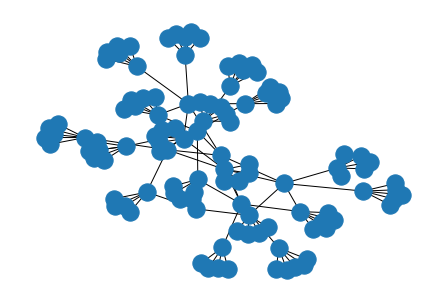

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

"""
This function finds the five most popular reciprocal friends of the user.
Takes list of friend IDS and follower IDS
Uses set notation from slides to get the reciprocal friends, then convert to a list
Ranks the reciprocal friends based on number of followers and returns list of 5 reciprocal friends with the most followers
"""

def find_five_pop_reciprocals(friends_ids, followers_ids):
    reciprocal_friends = set(friends_ids) & set(followers_ids)
    l_recip = list(reciprocal_friends)

    first_100 = l_recip[:100]

    followers_with_count = []

    i = 0
    five_most_popular = []
    while i < len(l_recip):
        friend_batch = l_recip[i:i+100]
        print("friend_batch: ", len(friend_batch))
        response = cb.get_user_profile(twitter_api, user_ids=friend_batch)
        for r in response:
            followers_with_count.append((response[r]["id"],response[r]["followers_count"]))
        i += 100

    followers_with_count.sort(key=lambda x: x[1],reverse=True)

    top_five = followers_with_count[:5]
    print("top five: ", top_five)

    fmp_user_ids = [i[0] for i in top_five]

    return fmp_user_ids


G = nx.Graph()
ids = [165035772]

key = 165035772

G.add_nodes_from(ids)

followers = jfk["ids"]
friends = iop["ids"]

# find the 5 most popular reciprocals of the user
top_five_recip = find_five_pop_reciprocals(friends, followers)

# print("top five recip: ", top_five_recip)


# ad the top five reciprocals to the ids list, going to do DFS on those until we have 100 ids
ids += top_five_recip

next_queue = top_five_recip


G.add_nodes_from(top_five_recip)

edges = map(lambda e: (key, e), top_five_recip)
G.add_edges_from(edges)




depth = 1
max_depth = 5
"""
This crawler is largley derived from the slides, with modifications to fit the parameters of the assignment.
Crawls until the max depth has been reached, i.e the distance 5 reciprocal friends, or until the graph contains 100 nodes
"""
while depth < max_depth and len(ids) < 100:
  depth += 1
  (queue, next_queue) = (next_queue,[])

  for id in queue:
    response_a = cb.make_twitter_request(twitter_api.followers.ids, user_id=id, count = 5000) 
    response_b = cb.make_twitter_request(twitter_api.friends.ids, user_id=id, count=5000)
    followers = response_a["ids"]
    friends = response_a["ids"]
    top_five_recip = find_five_pop_reciprocals(friends, followers)
    # print("top five recip: ", top_five_recip)  

    # building the social network as the crawler works
    G.add_nodes_from(top_five_recip)

    edges = map(lambda e: (id, e), top_five_recip)
    G.add_edges_from(edges)

    if top_five_recip:
      print("Got followers for {0}: {1}".format(id,top_five_recip))
      for i in top_five_recip:
        if(i not in next_queue and i not in ids): 
          next_queue.append(i)
    else:
      print(str(id) + "is protected")

  ids += next_queue

print(ids)

#calculating the diameter of the graph after the crawler has finished
diameter = nx.diameter(G)
print("Diameter of graph: ", diameter)

avg_length = nx.average_shortest_path_length(G)

nx.draw(G)
plt.savefig("mygraph.png", dpi=1000)
plt.show()


In [42]:
print(avg_length)

4.589516789516789
